In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [49]:
train_dir = "C:/Users/admin/Documents/Untitled Folder 1/NewFinalpR/models/pancreas ct scans/train"
test_dir = "C:/Users/admin/Documents/Untitled Folder 1/NewFinalpR/models/pancreas ct scans/test"

In [50]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

Found 999 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [53]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

c:\Users\admin\Documents\Untitled Folder 1\NewFinalpR\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


c:\Users\admin\Documents\Untitled Folder 1\NewFinalpR\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8906 - loss: 0.2593 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 508ms/step - accuracy: 0.9862 - loss: 0.0553 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 595ms/step - accuracy: 0.9748 - loss: 0.0612 - val_accuracy: 1.0000 - val_loss: 1.8624e-04
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 526ms/step - accuracy: 0.9833 - loss: 0.0410 - val_accuracy: 1.0000 - val_loss: 6.4212e-04
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 746ms/step - accuracy: 0.9838 - loss: 0.0386 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 587ms/step - accuracy: 0.9849 - loss: 0.0417 - val_accuracy: 1.0000 - val_loss: 2.6429e-04
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 498ms/step - accuracy: 0.9809 - loss: 0.0368 - val_accuracy: 1.0000 - val_loss: 2.4289e-04
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 797ms/step - accuracy: 0.9786 - loss: 0.03

In [56]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 1.0000 - loss: 0.0023
Test Accuracy: 100.00%


In [57]:
model.save("pancreas_cnn_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

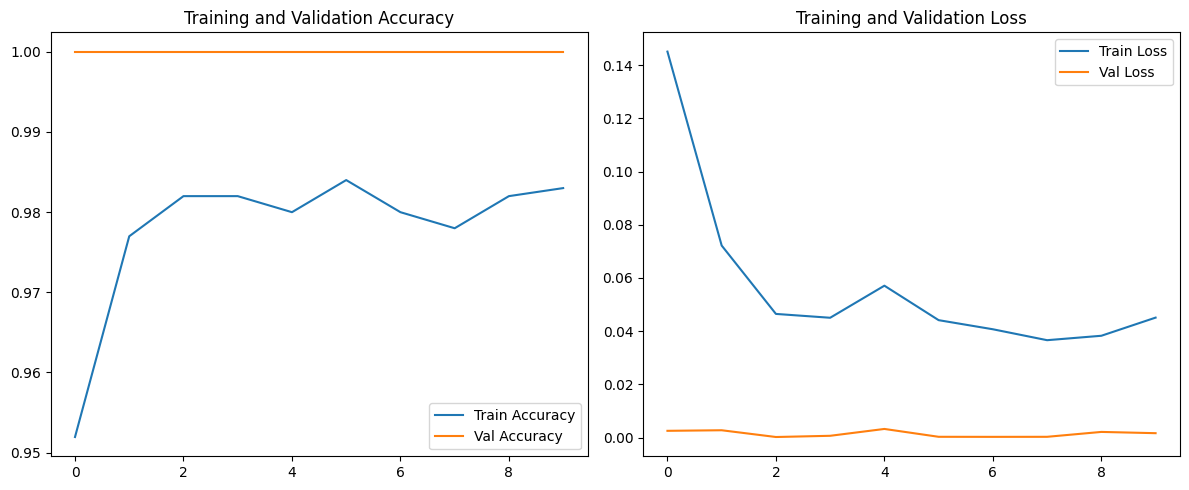

In [59]:
def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(EPOCHS)

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

plot_training_curves(history)

In [60]:
Y_pred = model.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)
y_true = test_generator.classes

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step


In [61]:
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

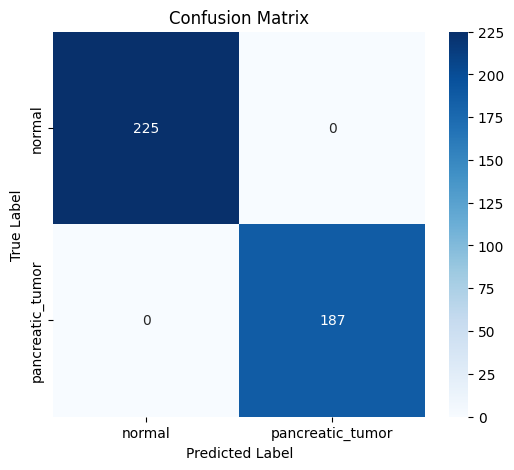

In [62]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [63]:
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:

                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00       225
pancreatic_tumor       1.00      1.00      1.00       187

        accuracy                           1.00       412
       macro avg       1.00      1.00      1.00       412
    weighted avg       1.00      1.00      1.00       412

